In [ ]:
from keras.datasets import cifar10
from PIL import Image
from keras.utils import np_utils
from matplotlib import pyplot as plt
import keras
import sys
import numpy as np

In [ ]:
(X_trainSet,y_trainSet), (X_testSet, y_testSet)=cifar10.load_data()

In [ ]:
img_trainSet=[]
img_testSet=[]
for i in range(len(X_trainSet)):
  img_trainSet.append(X_trainSet[i].transpose([2,0,1]))
img_trainSet=np.array(img_trainSet)
for i in range(len(X_testSet)):
  img_testSet.append(X_testSet[i].transpose([2,0,1]))
img_testSet=np.array(img_testSet)
 

In [ ]:
img_trainSet.shape

(50000, 3, 32, 32)

In [ ]:
print(X_trainSet.shape)
print(X_testSet.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_trainSet[0].shape

(32, 32, 3)

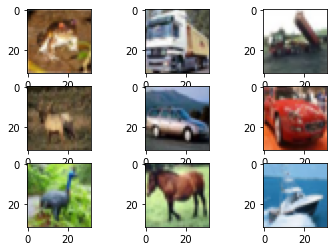

In [ ]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_trainSet[i]
    plt.imshow(img)
    
# display the plot
plt.show()

In [ ]:
seed=2
np.random.seed(seed)

(X_trainSet, y_trainSet),(X_testSet, y_testSet)=cifar10.load_data()

X_testSet=X_testSet.astype('float32')
img_testSet=img_testSet.astype('float32')

X_trainSet=X_trainSet.astype('float32')
img_trainSet=img_trainSet.astype('float32')




In [ ]:
X_trainSet=X_trainSet/255;
X_testSet=X_testSet/255;
img_testSet=img_testSet/255;
img_trainSet=img_trainSet/255;

In [ ]:
Y_trainSet=np_utils.to_categorical(y_trainSet)
Y_testSet=np_utils.to_categorical(y_testSet)
num_class=Y_testSet.shape[1]

In [ ]:
print(Y_trainSet.shape)
print(Y_trainSet[0])

print(Y_testSet.shape)
print(Y_testSet[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [ ]:
def allcnn(weights=None):
    model = Sequential()

    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weights:
        model.load_weights(weights)
    
    return model

In [ ]:
X_trainSet.shape

(50000, 32, 32, 3)

In [ ]:
img_trainSet.shape

(50000, 3, 32, 32)

In [ ]:

learning_rate = 0.04
weight_decay = 1e-5
momentum = 0.7

model = allcnn()

sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print (model.summary())

epochs = 200
batch_size = 32


model.fit(img_trainSet, Y_trainSet, validation_data=(img_testSet, Y_testSet), epochs=epochs, batch_size=batch_size, verbose = 1)
scores=model.evaluate(img_testSet,Y_testSet,verbose=1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 3, 32, 96)         27744     
_________________________________________________________________
activation_29 (Activation)   (None, 3, 32, 96)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 32, 96)         83040     
_________________________________________________________________
activation_30 (Activation)   (None, 3, 32, 96)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 2, 16, 96)         83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 16, 96)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 2, 16, 192)       

In [ ]:
scores = model.evaluate(img_testSet, Y_testSet, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 100us/step
Accuracy: 65.77%


In [ ]:
classes=range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [ ]:
batch=img_testSet[200:209]
labels=np.argmax(Y_testSet[200:209],axis=-1)

predictions=model.predict(batch,verbose=1)


9/9 [==============================] - 0s 4ms/step


In [ ]:
print (predictions)

[[1.19164102e-02 7.22521916e-03 9.18412879e-02 5.66698551e-01
  1.79970227e-02 1.27351686e-01 1.53782740e-01 8.30188207e-03
  7.57716224e-03 7.30798673e-03]
 [1.00704888e-02 4.69176434e-02 1.99381233e-04 4.57137648e-05
  3.81335849e-05 1.59424144e-05 1.55737260e-04 1.52842011e-04
  9.76268784e-04 9.41427886e-01]
 [4.91313870e-07 9.20592697e-07 3.15511527e-12 3.87111241e-13
  1.50878252e-15 3.37284899e-15 2.67020140e-14 1.04752183e-15
  9.99998569e-01 8.64614478e-13]
 [2.56782956e-02 2.24953052e-04 5.75102754e-02 1.14033567e-02
  5.56190729e-01 6.23126440e-02 4.00734833e-03 2.81024456e-01
  1.44328651e-05 1.63345516e-03]
 [8.67107035e-15 1.00000000e+00 2.33240365e-18 1.16117523e-16
  3.57315218e-24 9.52172566e-19 2.72660974e-12 6.32487863e-21
  2.51133495e-15 6.10643688e-11]
 [2.68125627e-03 2.58583779e-04 4.92999330e-02 5.44941247e-01
  7.53848022e-03 3.61296713e-01 6.87921606e-03 2.62820274e-02
  6.24287350e-04 1.98186681e-04]
 [1.53316767e-03 1.67604638e-04 6.97563664e-05 1.07300375e

In [ ]:
class_result=np.argmax(predictions, axis=-1)
print (class_result)

[3 9 8 4 1 3 8 5 7]


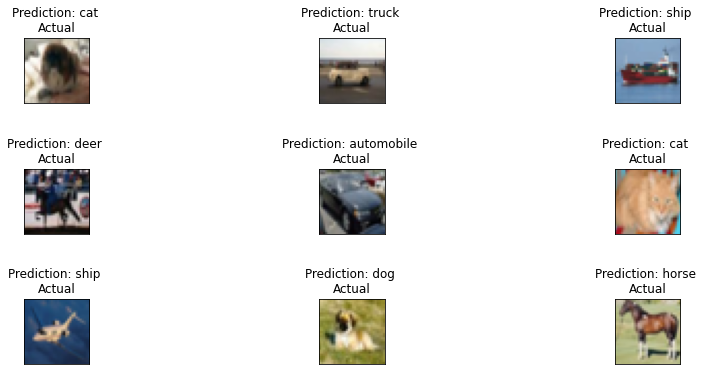

In [ ]:
fig, axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {} \nActual'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img.transpose([1,2,0]))

plt.show()